h = 0.06666666666666667


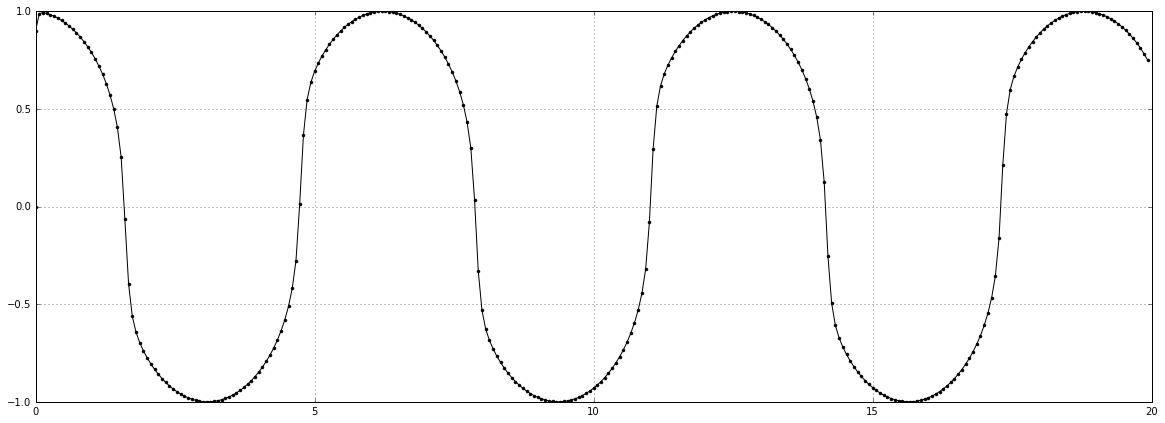

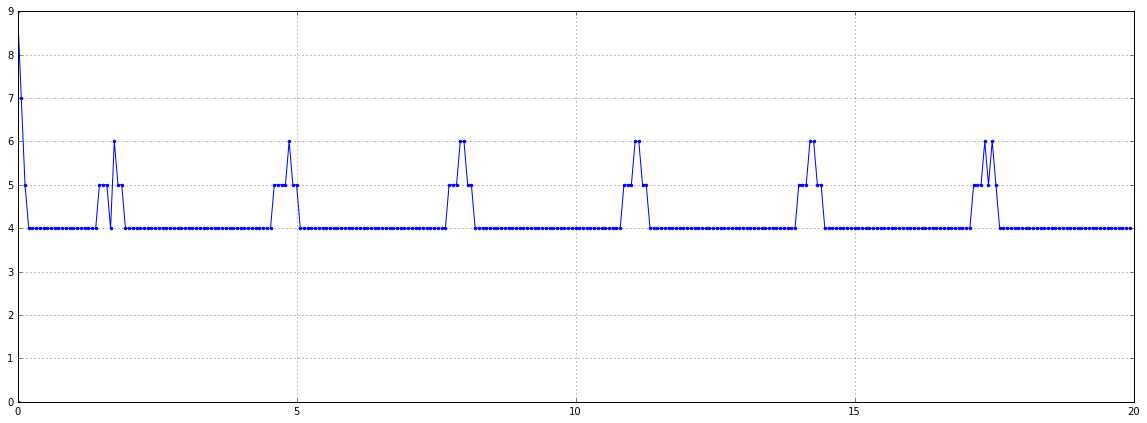

In [34]:
import numpy as np
import math
import scipy.optimize
import matplotlib.pyplot as plt

%matplotlib inline

def G(t, u): 
    return 50 * (math.cos(t) - u ** 3)
def partialDerivG(t, u):
    return - 150 * u ** 2

def inc(d):
    d[0] += 1
    return 0

def step(tn, h, un):
    it = [0];
    k1 = scipy.optimize.newton(
        func = lambda k: inc(it) + k - G(tn + h, un + h * k), 
        fprime = lambda k: 1 - h * partialDerivG(tn + h, un + h*k),
        x0 = G(tn, un), tol=1e-12, maxiter=10)
    return un + k1 * h, it[0]

def imeuler(N):
    T = 20
    h = T / N
    print('h =', h)
    u = np.zeros((N + 1, 3))
    u[0] = np.array([0, 0, 0])
    for n in range(N):
        u[n+1, 0] = h * n
        u[n+1, 1:] = step(u[n+1, 0], h, u[n, 1])
    return u

N = 300
y = imeuler(N)
plt.figure(figsize=(20, 7))
plt.plot(y[:,0], y[:,1], 'k.-')
plt.grid()
plt.figure(figsize=(20, 7))
plt.plot(y[:,0], y[:,2], '.-')
plt.grid()
plt.show()